### 강의에서 소개된 파이썬 주요 기능
- pandas.DataFrame.diff: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
- pandas.DataFrame.shift: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
- matplotlib.pyplot.annotate: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

### 경기 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.plot_utils import draw_pitch

In [2]:
match_id = 2057987
match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057987,259956834,1H,1.797,14855,Korea Republic,14911,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,2057987,259956835,1H,4.181,14855,Korea Republic,61962,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,2057987,259956837,1H,10.078,14855,Korea Republic,95200,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,2057987,259956840,1H,12.278,14855,Korea Republic,138633,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,2057987,259956841,1H,15.823,14855,Korea Republic,138633,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2057987,259958565,2H,2995.205,15473,Mexico,112522,J. Corona,Pass,Simple pass,[Accurate],74.88,57.12,63.44,55.08
1465,2057987,259958567,2H,2997.217,15473,Mexico,3795,H. Moreno,Pass,Simple pass,[Accurate],63.44,55.08,59.28,45.56
1466,2057987,259958568,2H,2997.948,15473,Mexico,59003,R. Márquez,Pass,Simple pass,[Accurate],59.28,45.56,31.20,48.96
1467,2057987,259958570,2H,3000.929,15473,Mexico,255387,C. Salcedo,Pass,Simple pass,[Accurate],31.20,48.96,22.88,26.52


### 이벤트 시퀀스 시각화

##### (1) 위치와 무관한 데이터 제외 및 원정팀 공격방향 회전

In [3]:
match_events['display_time'] = match_events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
cols = ['period', 'time', 'display_time', 'team_name', 'player_name'] + match_events.columns[8:-1].tolist()
match_events = match_events[match_events['event_type'] != 'Substitution'][cols]

team1_name, team2_name = match_events['team_name'].unique()
team2_x = match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']]
team2_y = match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']]
match_events.loc[match_events['team_name'] == team2_name, ['start_x', 'end_x']] = 104 - team2_x
match_events.loc[match_events['team_name'] == team2_name, ['start_y', 'end_y']] = 68 - team2_y

##### (2) 이벤트 시퀀스(event sequence) 단순 시각화

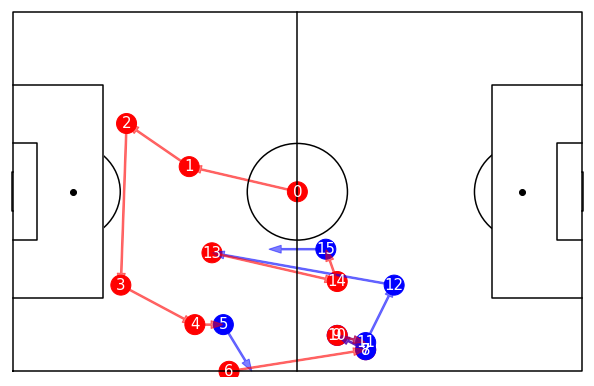

,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H 00:01,Korea Republic,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,1H 00:04,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,1H 00:10,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,1H 00:12,Korea Republic,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,1H 00:15,Korea Republic,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
5,1H 00:16,Mexico,H. Lozano,Others on the ball,Touch,[Interception],38.48,8.84,43.68,0.00
6,1H 00:25,Korea Republic,Yong Lee,Free kick,Throw in,[Accurate],39.52,0.00,64.48,4.08
7,1H 00:27,Korea Republic,Seon-Min Moon,Duel,Ground attacking duel,"[Anticipation, Neutral, Accurate]",64.48,4.08,59.28,6.80
8,1H 00:27,Mexico,J. Gallardo,Duel,Ground defending duel,"[Anticipated, Neutral, Accurate]",64.48,4.08,59.28,6.80
9,1H 00:29,Mexico,H. Lozano,Duel,Ground defending duel,"[Won, Accurate]",59.28,6.80,64.48,5.44


In [4]:
first_idx = 0
last_idx = 15
seq_events = match_events.loc[first_idx:last_idx]

draw_pitch('white', 'black')

color_dict = {team1_name: 'red', team2_name: 'blue'}
colors = seq_events['team_name'].apply(lambda x: color_dict[x])
plt.scatter(seq_events['start_x'], seq_events['start_y'], c=colors, s=400)

for i, event in seq_events.iterrows():
    x = event['start_x']
    y = event['start_y']
    plt.annotate(i, xy=[x, y], color='white', ha='center', va='center', fontsize=15)
    if not np.isnan(event['end_x']):
        dx = event['end_x'] - x
        dy = event['end_y'] - y
        color = color_dict[event['team_name']]
        plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, length_includes_head=True, color=color, alpha=0.5)

plt.show()
seq_events[seq_events.columns[2:]]

##### (3) 경합(duel) 데이터 처리

- 직후 경합과의 시점/위치 차이 계산 - 같이 발생한 경합의 경우 시점/위치 차이가 적음

In [5]:
duels = seq_events[seq_events['event_type'] == 'Duel']
duels[['time', 'start_x', 'start_y']].round(3).diff().shift(-1)

,time,start_x,start_y
7,0.017,0.0,0.00
8,1.696,-5.2,2.72
9,0.12,0.0,0.00
10,NaN,NaN,NaN


- 직후 경합과의 시점/위치 차이로 점수 계산 - 점수가 작으면 직후 경합과 같이 발생한 것이므로 제외 예정

In [6]:
diffs = duels[['time', 'start_x', 'start_y']].round(3).diff().shift(-1).fillna(10).abs().sum(axis=1)
diffs

7      0.017
8      9.616
9      0.120
10    30.000
dtype: float64

- 동시에 발생한 여러 개의 경합 중 마지막 기록만 남기고 제외

In [7]:
seq_events_plotted = seq_events.drop(index=duels[diffs < 2].index)
seq_events_plotted

,period,time,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H,1.797,1H 00:01,Korea Republic,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,1H,4.181,1H 00:04,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,1H,10.078,1H 00:10,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,1H,12.278,1H 00:12,Korea Republic,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,1H,15.823,1H 00:15,Korea Republic,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
5,1H,16.444,1H 00:16,Mexico,H. Lozano,Others on the ball,Touch,[Interception],38.48,8.84,43.68,0.00
6,1H,25.235,1H 00:25,Korea Republic,Yong Lee,Free kick,Throw in,[Accurate],39.52,0.00,64.48,4.08
8,1H,27.513,1H 00:27,Mexico,J. Gallardo,Duel,Ground defending duel,"[Anticipated, Neutral, Accurate]",64.48,4.08,59.28,6.80
10,1H,29.329,1H 00:29,Korea Republic,Seon-Min Moon,Duel,Ground attacking duel,"[Lost, Not accurate]",59.28,6.80,64.48,5.44
11,1H,30.291,1H 00:30,Mexico,J. Gallardo,Pass,Simple pass,[Accurate],64.48,5.44,69.68,16.32


- 남겨진 경합 기록의 수행 팀을 중립으로 변경

In [8]:
seq_events_plotted.loc[seq_events_plotted['event_type'] == 'Duel', 'team_name'] = 'Duel'
seq_events_plotted

,period,time,display_time,team_name,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,1H,1.797,1H 00:01,Korea Republic,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,1H,4.181,1H 00:04,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,1H,10.078,1H 00:10,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,1H,12.278,1H 00:12,Korea Republic,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,1H,15.823,1H 00:15,Korea Republic,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
5,1H,16.444,1H 00:16,Mexico,H. Lozano,Others on the ball,Touch,[Interception],38.48,8.84,43.68,0.00
6,1H,25.235,1H 00:25,Korea Republic,Yong Lee,Free kick,Throw in,[Accurate],39.52,0.00,64.48,4.08
8,1H,27.513,1H 00:27,Duel,J. Gallardo,Duel,Ground defending duel,"[Anticipated, Neutral, Accurate]",64.48,4.08,59.28,6.80
10,1H,29.329,1H 00:29,Duel,Seon-Min Moon,Duel,Ground attacking duel,"[Lost, Not accurate]",59.28,6.80,64.48,5.44
11,1H,30.291,1H 00:30,Mexico,J. Gallardo,Pass,Simple pass,[Accurate],64.48,5.44,69.68,16.32


##### (4) 경합 데이터 처리를 반영한 이벤트 시퀀스 시각화 함수 구현

In [9]:
def visualize_sequence(match_events, first_idx, last_idx, title=None, filename=None, rotate_team2_events=False):
    cols = [
        'period', 'time', 'display_time', 'team_name', 'player_name',
        'event_type', 'sub_event_type', 'tags', 'start_x', 'start_y', 'end_x', 'end_y'
    ]
    match_events = match_events[match_events['event_type'] != 'Substitution'][cols]

    team1_name, team2_name = match_events['team_name'].unique()

    seq_events = match_events.loc[first_idx:last_idx].copy()
    if rotate_team2_events:
        team2_idx = seq_events['team_name'] == team2_name
        seq_events.loc[team2_idx, ['start_x', 'end_x']] = 104 - seq_events.loc[team2_idx, ['start_x', 'end_x']]
        seq_events.loc[team2_idx, ['start_y', 'end_y']] = 68 - seq_events.loc[team2_idx, ['start_y', 'end_y']]

    duels = seq_events[seq_events['event_type'] == 'Duel']
    diffs = duels[['time', 'start_x', 'start_y']].diff().shift(-1).fillna(10).abs().sum(axis=1)
    seq_events_plotted = seq_events.drop(index=duels[diffs < 2].index)
    seq_events_plotted.loc[seq_events_plotted['event_type'] == 'Duel', 'team_name'] = 'Duel'

    draw_pitch('white', 'black')

    color_dict = {team1_name: 'red', team2_name: 'blue', 'Duel': 'black'}
    colors = seq_events_plotted['team_name'].apply(lambda x: color_dict[x])
    plt.scatter(seq_events_plotted['start_x'], seq_events_plotted['start_y'], c=colors, s=400)

    for i, event in seq_events_plotted.iterrows():
        x = event['start_x']
        y = event['start_y']
        plt.annotate(i % 100, xy=[x, y], color='white', ha='center', va='center', fontsize=15)
        if not np.isnan(event['end_x']):
            dx = event['end_x'] - x
            dy = event['end_y'] - y
            color = color_dict[event['team_name']]
            plt.arrow(x, y, dx, dy, width=0.3, head_width=1.5, length_includes_head=True, color=color, alpha=0.5)

    if title is None:
        title = seq_events['display_time'].iloc[-1]
    plt.title(title, fontdict={'size': 20})
    
    if filename is not None:
        plt.savefig(f'img/{filename}', bbox_inches='tight')

    plt.show()
    return seq_events[seq_events.columns[2:-4]]

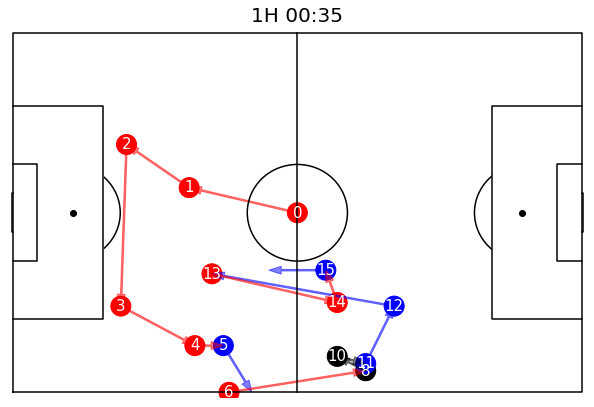

,display_time,team_name,player_name,event_type,sub_event_type,tags
0,1H 00:01,Korea Republic,Son Heung-Min,Pass,Simple pass,[Accurate]
1,1H 00:04,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate]
2,1H 00:10,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate]
3,1H 00:12,Korea Republic,Hyun-Soo Jang,Others on the ball,Touch,[]
4,1H 00:15,Korea Republic,Hyun-Soo Jang,Pass,Simple pass,[Not accurate]
5,1H 00:16,Mexico,H. Lozano,Others on the ball,Touch,[Interception]
6,1H 00:25,Korea Republic,Yong Lee,Free kick,Throw in,[Accurate]
7,1H 00:27,Korea Republic,Seon-Min Moon,Duel,Ground attacking duel,"[Anticipation, Neutral, Accurate]"
8,1H 00:27,Mexico,J. Gallardo,Duel,Ground defending duel,"[Anticipated, Neutral, Accurate]"
9,1H 00:29,Mexico,H. Lozano,Duel,Ground defending duel,"[Won, Accurate]"


In [10]:
visualize_sequence(match_events, 0, 15)

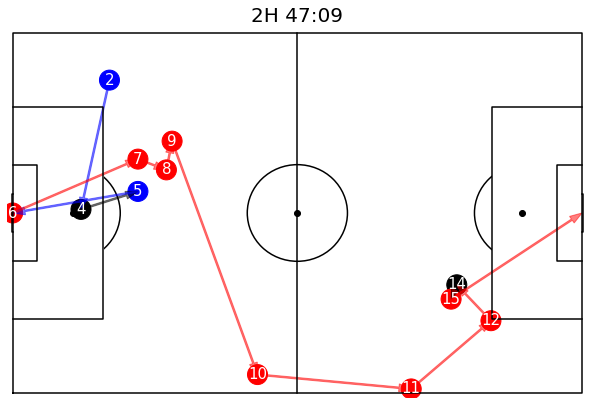

,display_time,team_name,player_name,event_type,sub_event_type,tags
1402,2H 46:35,Mexico,J. Corona,Free kick,Free kick cross,"[High, Accurate]"
1403,2H 46:36,Mexico,J. Hernández,Duel,Air duel,"[Lost, Not accurate]"
1404,2H 46:36,Korea Republic,Hyun-Soo Jang,Duel,Air duel,"[Won, Accurate]"
1405,2H 46:38,Mexico,H. Herrera,Shot,Shot,"[Right foot, Position: Out high center, Not ac..."
1406,2H 46:49,Korea Republic,Hyun-Woo Cho,Free kick,Goal kick,[]
1407,2H 46:51,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate]
1408,2H 46:52,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate]
1409,2H 46:55,Korea Republic,Young-Gwon Kim,Pass,High pass,[Accurate]
1410,2H 46:59,Korea Republic,Yong Lee,Pass,Simple pass,[Accurate]
1411,2H 47:02,Korea Republic,Jae-Sung Lee,Others on the ball,Touch,[]


In [11]:
visualize_sequence(match_events, 1402, 1415)

### 공격 시퀀스 검출 및 시각화

##### (1) 공격 시퀀스(attacking sequence) 검출

- 현재 이벤트와 직전 이벤트를 비교하여 팀 소유권이 유지되는 구간 검출

In [12]:
events_except_duels = match_events[match_events['event_type'] != 'Duel']

seq_records = []
event_idxs = [events_except_duels.index[0]]

for i in events_except_duels.index[1:]:
    prev_event = match_events.loc[event_idxs[-1]]
    cur_event = match_events.loc[i]
    if (
        cur_event['period'] == prev_event['period'] and
        cur_event['event_type'] != 'Free kick' and
        cur_event['time'] - prev_event['time'] < 15 and
        cur_event['team_name'] == prev_event['team_name']
    ):
        event_idxs.append(i)
    else:
        seq_records.append({
            'team_name': match_events.at[event_idxs[0], 'team_name'],
            'first_idx': event_idxs[0],
            'last_idx': event_idxs[-1]
        })
        event_idxs = [i]

seq_records = pd.DataFrame(seq_records)
seq_records['len'] = seq_records['last_idx'] - seq_records['first_idx'] + 1
seq_records = seq_records[seq_records['len'] >= 2].reset_index(drop=True)
seq_records

,team_name,first_idx,last_idx,len
0,Korea Republic,0,4,5
1,Mexico,11,12,2
2,Korea Republic,13,14,2
3,Mexico,19,29,11
4,Korea Republic,30,32,3
...,...,...,...,...
174,Mexico,1427,1429,3
175,Mexico,1434,1435,2
176,Korea Republic,1440,1441,2
177,Mexico,1444,1445,2


##### (2) 슈팅/득점 시퀀스(shot/goal sequence) 추출

- 공격 시퀀스별 마지막 이벤트 정보 추가

In [13]:
seq_records['last_x'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_x'])
seq_records['last_y'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_y'])
seq_records['last_event_type'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'event_type'])
seq_records['last_event_tags'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'tags'])
seq_records

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
0,Korea Republic,0,4,5,33.28,8.84,Pass,[Not accurate]
1,Mexico,11,12,2,69.68,16.32,Pass,[Not accurate]
2,Korea Republic,13,14,2,59.28,17.00,Pass,[Not accurate]
3,Mexico,19,29,11,59.28,51.00,Pass,"[Through, Not accurate]"
4,Korea Republic,30,32,3,23.92,5.44,Pass,[Not accurate]
...,...,...,...,...,...,...,...,...
174,Mexico,1427,1429,3,43.68,45.56,Pass,[Accurate]
175,Mexico,1434,1435,2,32.24,46.24,Pass,[Accurate]
176,Korea Republic,1440,1441,2,10.40,38.08,Pass,[Accurate]
177,Mexico,1444,1445,2,57.20,56.44,Pass,[Accurate]


- 슈팅 시퀀스 필터링

In [14]:
seq_records[seq_records['last_event_type'] == 'Shot']

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
24,Mexico,173,175,3,12.48,40.12,Shot,"[Head/body, Opportunity, Position: Out center ..."
36,Korea Republic,335,339,5,90.48,22.44,Shot,"[Counter attack, Left foot, Blocked, Opportuni..."
38,Korea Republic,346,349,4,92.56,30.60,Shot,"[Head/body, Opportunity, Position: Goal high c..."
47,Mexico,390,395,6,14.56,39.44,Shot,"[Right foot, Opportunity, Position: Goal high ..."
68,Korea Republic,556,565,10,100.88,47.60,Shot,"[Counter attack, Right foot, Opportunity, Posi..."
77,Mexico,635,640,6,12.48,19.72,Shot,"[Right foot, Opportunity, Position: Out high c..."
80,Korea Republic,656,669,14,81.12,23.12,Shot,"[Left foot, Blocked, Not accurate]"
94,Mexico,787,792,6,22.88,17.68,Shot,"[Right foot, Opportunity, Position: Out high c..."
98,Mexico,807,811,5,24.96,36.72,Shot,"[Counter attack, Right foot, Opportunity, Posi..."
100,Korea Republic,818,823,6,91.52,25.16,Shot,"[Right foot, Blocked, Opportunity, Not accurate]"


- 득점 시퀀스 필터링

In [15]:
seq_records[seq_records['last_event_tags'].apply(lambda x: 'Goal' in x)]

,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
125,Mexico,1020,1026,7,9.36,24.48,Shot,"[Goal, Counter attack, Right foot, Opportunity..."
172,Korea Republic,1406,1415,10,80.08,17.68,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."


- 멕시코 득점 시퀀스 시각화

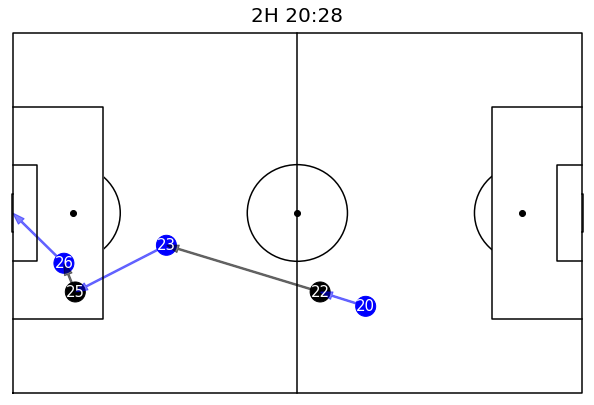

,display_time,team_name,player_name,event_type,sub_event_type,tags
1020,2H 20:19,Mexico,H. Lozano,Others on the ball,Acceleration,"[Counter attack, Accurate]"
1021,2H 20:21,Korea Republic,Jae-Sung Lee,Duel,Ground defending duel,"[Sliding tackle, Lost, Not accurate]"
1022,2H 20:22,Mexico,H. Lozano,Duel,Ground attacking duel,"[Counter attack, Won, Accurate]"
1023,2H 20:26,Mexico,H. Lozano,Pass,Smart pass,"[Assist, Counter attack, Through, Accurate]"
1024,2H 20:27,Mexico,J. Hernández,Duel,Ground attacking duel,"[Counter attack, Free space right, Won, Accurate]"
1025,2H 20:27,Korea Republic,Hyun-Soo Jang,Duel,Ground defending duel,"[Free space left, Lost, Not accurate]"
1026,2H 20:28,Mexico,J. Hernández,Shot,Shot,"[Goal, Counter attack, Right foot, Opportunity..."


In [16]:
seq_id = 125
first_idx = seq_records.at[seq_id, 'first_idx']
last_idx = seq_records.at[seq_id, 'last_idx']
visualize_sequence(match_events, first_idx, last_idx)

- 대한민국 득점 시퀀스 시각화

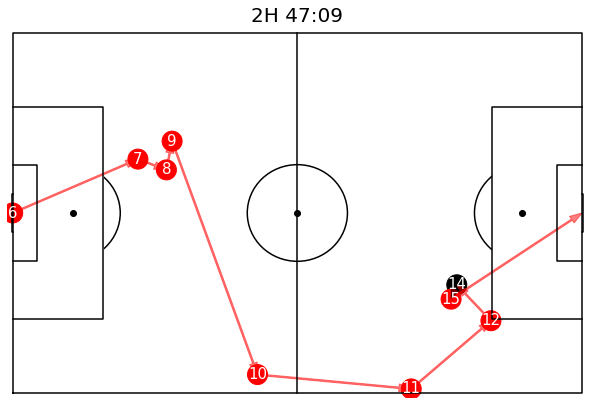

,display_time,team_name,player_name,event_type,sub_event_type,tags
1406,2H 46:49,Korea Republic,Hyun-Woo Cho,Free kick,Goal kick,[]
1407,2H 46:51,Korea Republic,Young-Gwon Kim,Pass,Simple pass,[Accurate]
1408,2H 46:52,Korea Republic,Sung-Yeung Ki,Pass,Simple pass,[Accurate]
1409,2H 46:55,Korea Republic,Young-Gwon Kim,Pass,High pass,[Accurate]
1410,2H 46:59,Korea Republic,Yong Lee,Pass,Simple pass,[Accurate]
1411,2H 47:02,Korea Republic,Jae-Sung Lee,Others on the ball,Touch,[]
1412,2H 47:06,Korea Republic,Jae-Sung Lee,Pass,Simple pass,[Accurate]
1413,2H 47:08,Korea Republic,Son Heung-Min,Duel,Ground attacking duel,"[Free space left, Won, Accurate]"
1414,2H 47:09,Mexico,R. Márquez,Duel,Ground defending duel,"[Free space right, Lost, Not accurate]"
1415,2H 47:09,Korea Republic,Son Heung-Min,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."


In [17]:
seq_id = 172
first_idx = seq_records.at[seq_id, 'first_idx']
last_idx = seq_records.at[seq_id, 'last_idx']
visualize_sequence(match_events, first_idx, last_idx)

##### (3) 전체 슈팅 시퀀스 시각화

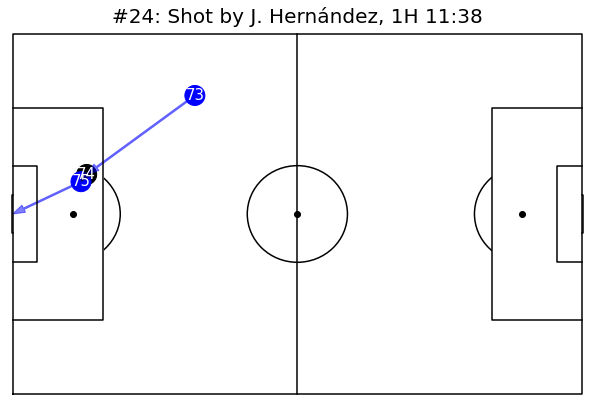

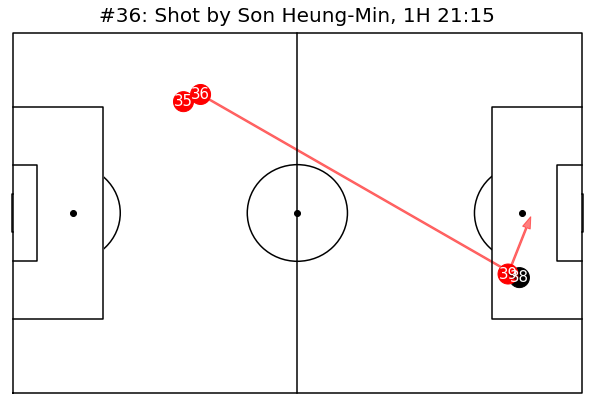

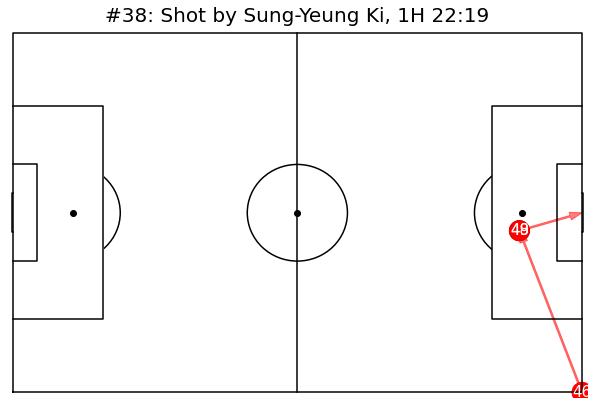

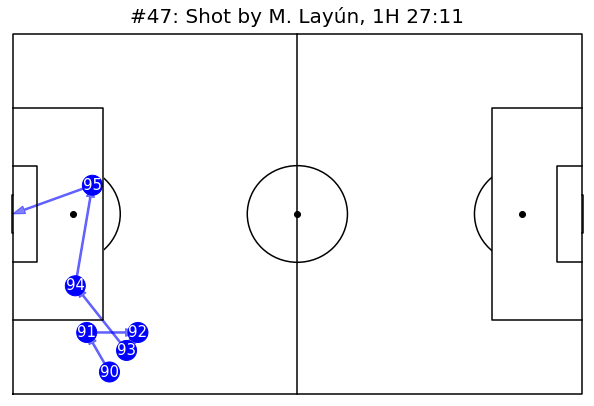

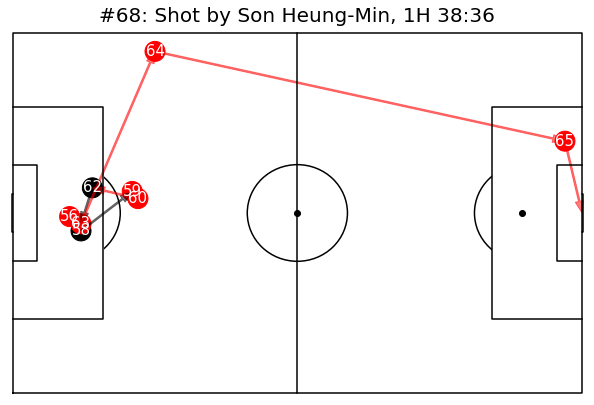

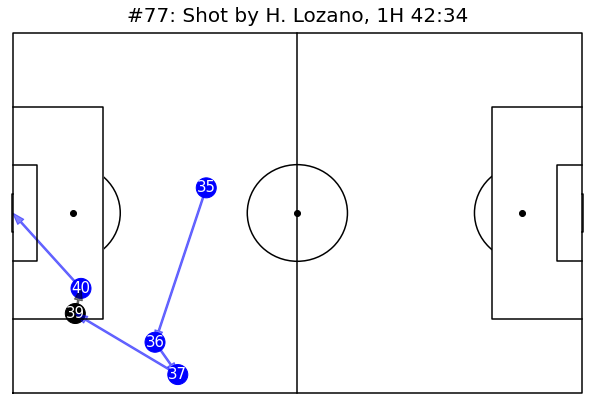

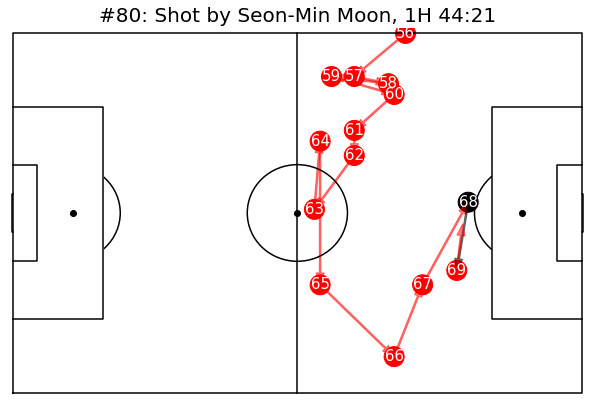

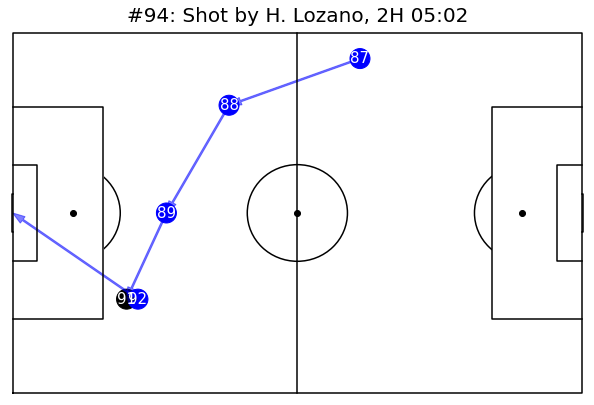

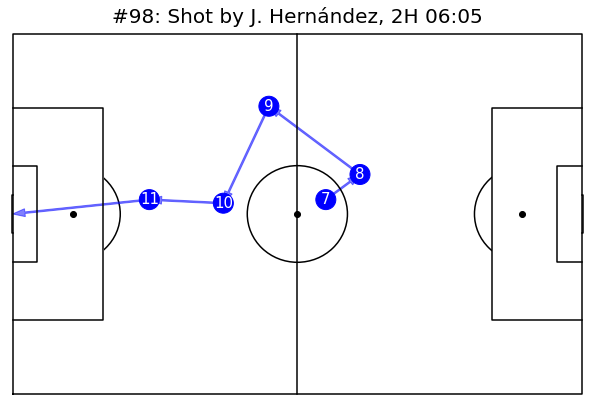

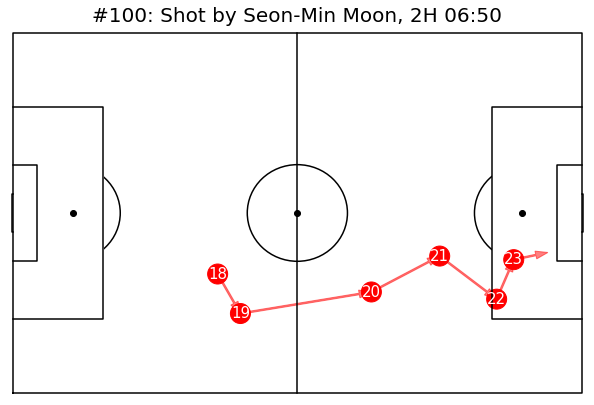

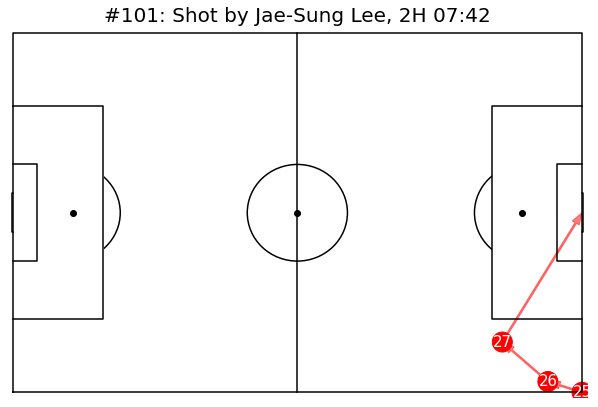

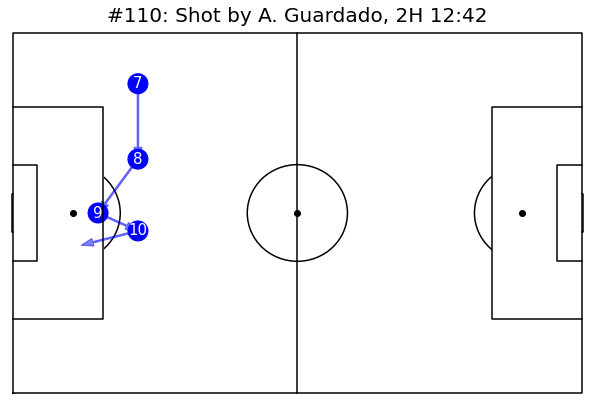

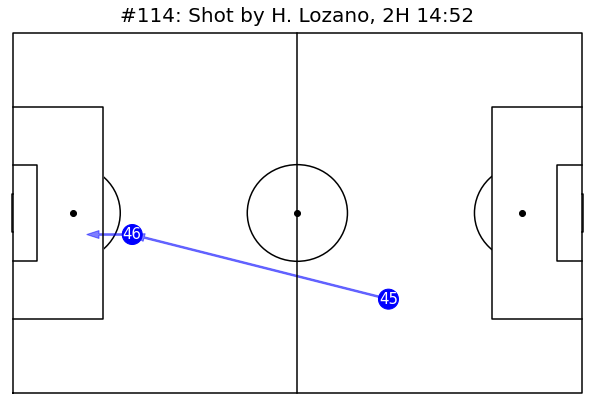

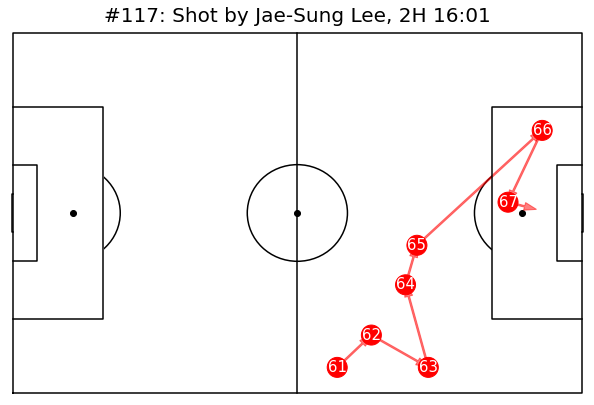

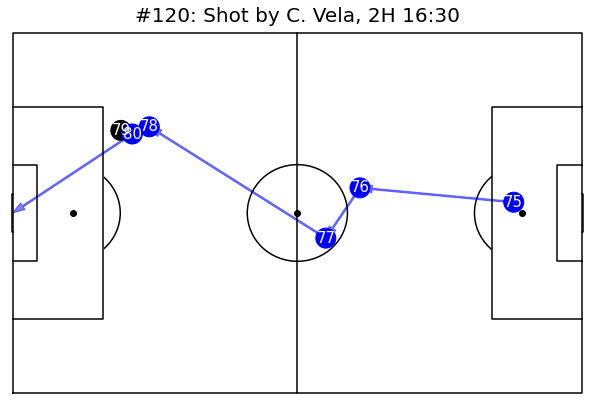

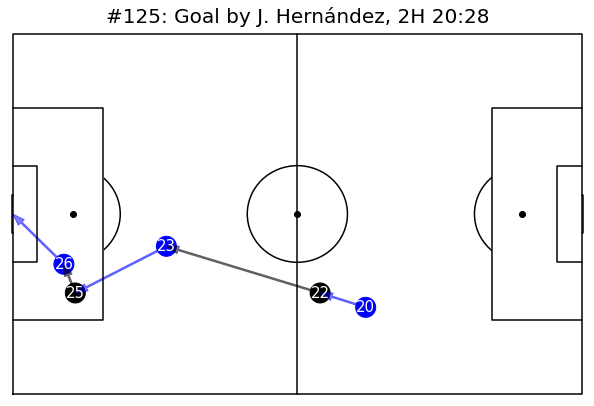

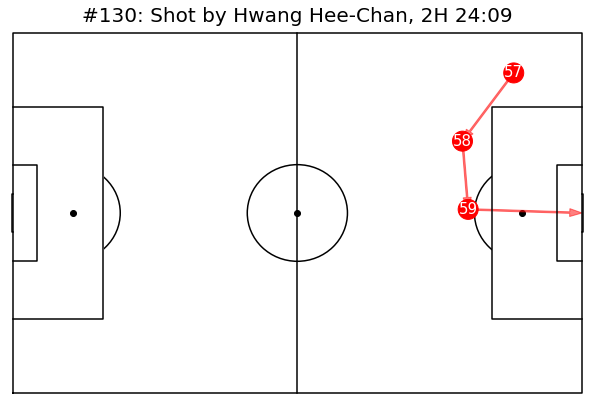

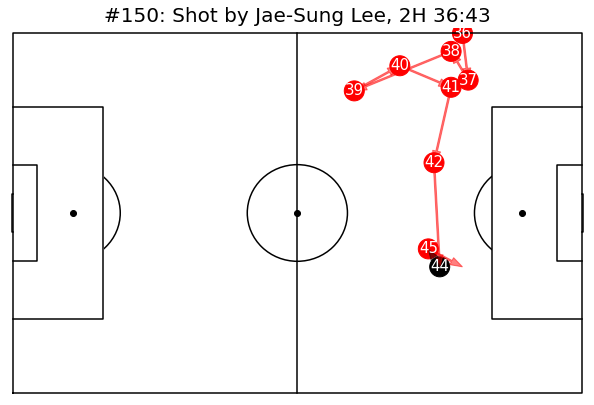

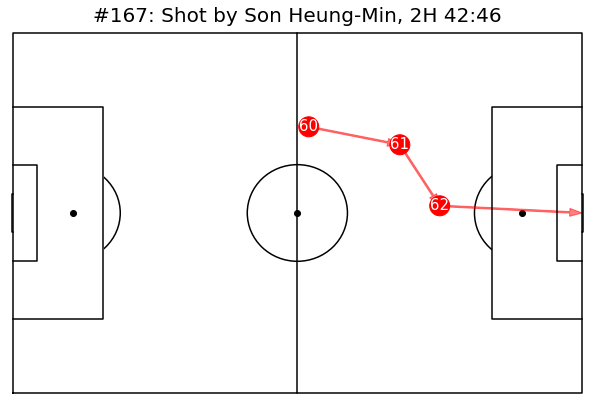

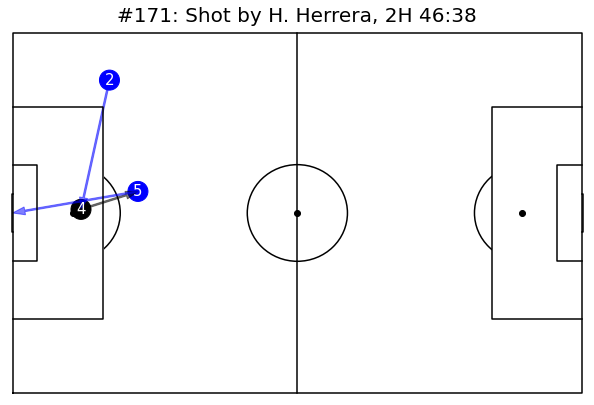

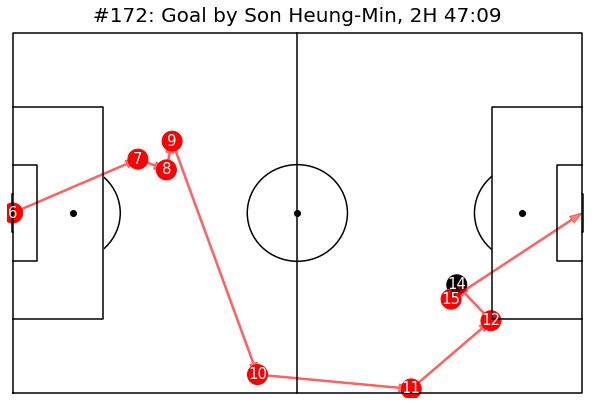

In [18]:
shot_seq_records = seq_records[seq_records['last_event_type'] == 'Shot']

for i in shot_seq_records.index:
    first_idx = seq_records.at[i, 'first_idx']
    last_idx = seq_records.at[i, 'last_idx']

    last_event_time = match_events.at[last_idx, 'display_time']
    last_event_type = match_events.at[last_idx, 'event_type']
    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    if 'Goal' in last_event_tags:
        title = f"#{i}: Goal by {last_event_player}, {last_event_time}"
    else:
        title = f"#{i}: {last_event_type} by {last_event_player}, {last_event_time}"

    visualize_sequence(match_events, first_idx, last_idx, title)

##### (4) 최장 공격 시퀀스 시각화

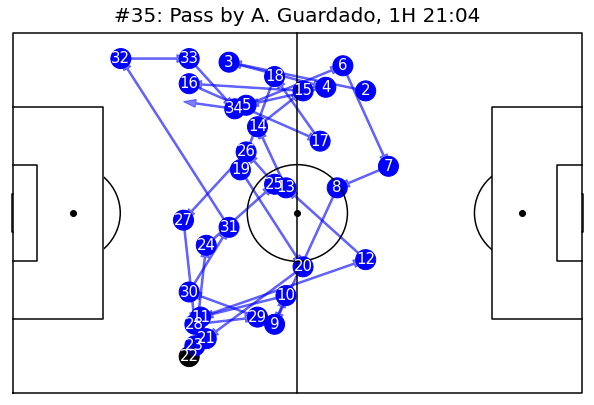

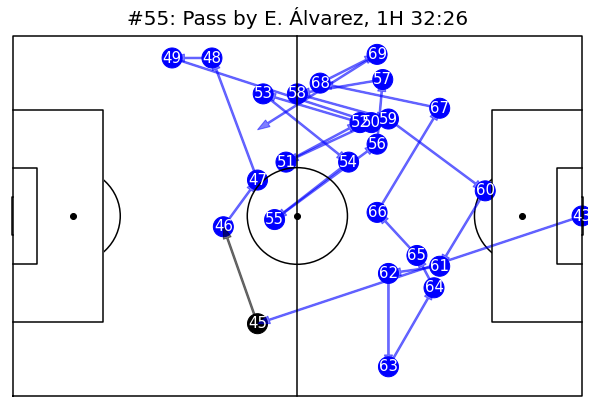

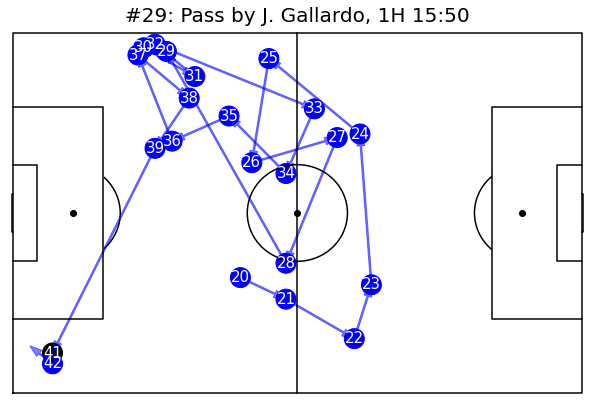

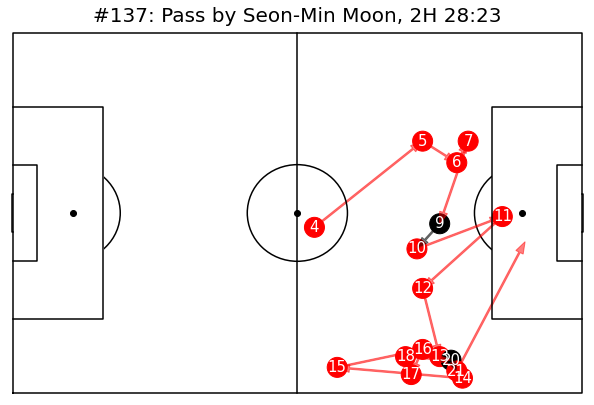

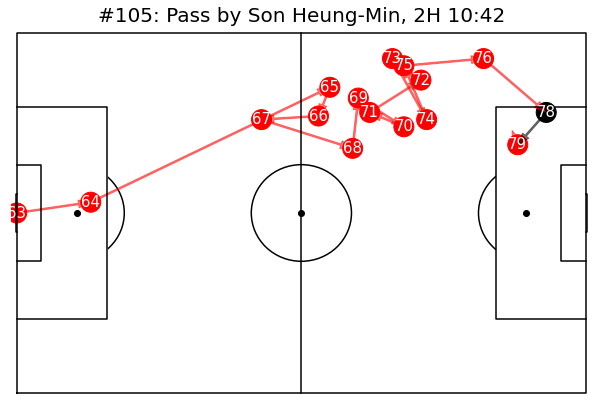

In [19]:
long_seq_records = seq_records.sort_values('len', ascending=False)[:5]

for i in long_seq_records.index:
    first_idx = long_seq_records.at[i, 'first_idx']
    last_idx = long_seq_records.at[i, 'last_idx']

    last_event_time = match_events.at[last_idx, 'display_time']
    last_event_type = match_events.at[last_idx, 'event_type']
    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    if 'Goal' in last_event_tags:
        title = f"#{i}: Goal by {last_event_player}, {last_event_time}"
    else:
        title = f"#{i}: {last_event_type} by {last_event_player}, {last_event_time}"

    visualize_sequence(match_events, first_idx, last_idx, title)

### 경기 내 공격 시퀀스 집계

##### (1) 단순 집계

In [20]:
seq_stats = pd.DataFrame(index=match_events['team_name'].unique())
seq_stats['mean_len'] = seq_records.groupby('team_name')['len'].mean().round(2)
seq_stats['att_seq_count'] = seq_records.groupby('team_name')['len'].count()
seq_stats

,mean_len,att_seq_count
Korea Republic,5.05,94
Mexico,6.75,85


##### (2) 슈팅 시퀀스 비율 집계

In [21]:
seq_stats['shot_seq_count'] = shot_seq_records.groupby('team_name')['len'].count().rename('shot_seqs')
seq_stats['shot_seq_rate'] = (seq_stats['shot_seq_count'] / seq_stats['att_seq_count']).round(4)
seq_stats

,mean_len,att_seq_count,shot_seq_count,shot_seq_rate
Korea Republic,5.05,94,11,0.1170
Mexico,6.75,85,10,0.1176


##### (3) 시퀀스 길이 분포 분석

- 시퀀스 길이별 횟수 집계

In [22]:
seq_len_counts = seq_records.pivot_table('first_idx', 'len', 'team_name', aggfunc='count', fill_value=0)
seq_len_counts

team_name,Korea Republic,Mexico
len,,
2,21,16
3,12,9
4,20,12
5,16,6
6,6,9
7,5,9
8,3,3
9,1,2
10,3,2


- 막대그래프 시각화

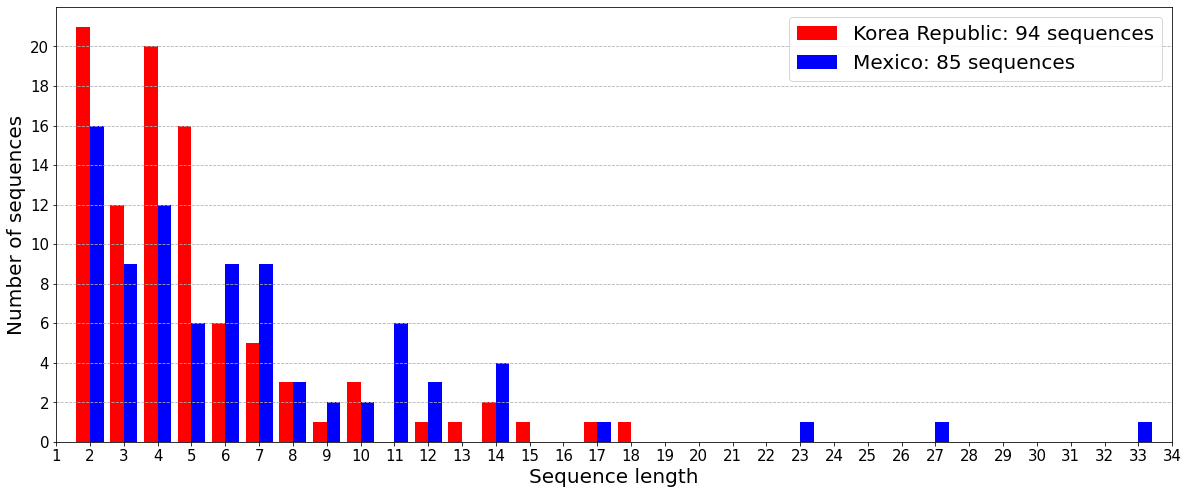

In [23]:
plt.figure(figsize=(20, 8))

team1_name, team2_name = seq_len_counts.columns
team1_label = f'{team1_name}: {seq_len_counts[team1_name].sum()} sequences'
team2_label = f'{team2_name}: {seq_len_counts[team2_name].sum()} sequences'
plt.bar(seq_len_counts.index - 0.2, seq_len_counts[team1_name], width=0.4, color='red', label=team1_label)
plt.bar(seq_len_counts.index + 0.2, seq_len_counts[team2_name], width=0.4, color='blue', label=team2_label)

max_len = seq_len_counts.index[-1] + 1
max_count = seq_len_counts.max().max() + 1
plt.xticks(np.arange(max_len) + 1, fontsize=15)
plt.yticks(np.arange(0, max_count, 2), fontsize=15)
plt.xlim(1, max_len)
plt.ylim(0, max_count)
plt.xlabel('Sequence length', fontdict={'size': 20})
plt.ylabel('Number of sequences', fontdict={'size': 20})

plt.grid(axis='y', linestyle='--')
plt.legend(fontsize=20)
plt.show()

### 대회 전체 공격 시퀀스 집계

##### (1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [24]:
dataset_name = 'World_Cup'
match_df = pd.read_csv(f'data/refined_events/{dataset_name}/matches.csv', index_col=0, encoding='utf-8-sig')

match_events_list = []

for match_id in match_df.index:
    match_events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events['display_time'] = events.apply(
    lambda x: f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}", axis=1
)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,display_time
0,2057954,258612104,1H,1.656,16521,Saudi Arabia,122671,Mohammad Al Sahlawi,Pass,Simple pass,[Accurate],52.00,34.00,36.40,31.96,1H 00:01
1,2057954,258612106,1H,4.488,16521,Saudi Arabia,139393,Abdullah Otayf,Pass,High pass,[Accurate],36.40,31.96,78.00,55.08,1H 00:04
2,2057954,258612077,1H,5.937,14358,Russia,103668,I. Kutepov,Duel,Air duel,"[Won, Accurate]",26.00,12.92,38.48,11.56,1H 00:05
3,2057954,258612112,1H,6.407,16521,Saudi Arabia,122940,Yasir Al Shahrani,Duel,Air duel,"[Lost, Not accurate]",78.00,55.08,65.52,56.44,1H 00:06
4,2057954,258612110,1H,8.562,16521,Saudi Arabia,122847,Salman Al Faraj,Pass,Simple pass,[Accurate],65.52,56.44,73.84,57.80,1H 00:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102508,2058017,263885652,2H,2978.302,9598,Croatia,3476,I. Rakitić,Pass,Simple pass,[Accurate],47.84,54.40,66.56,63.92,2H 49:38
102509,2058017,263885653,2H,2979.085,9598,Croatia,14812,I. Perišić,Others on the ball,Touch,[],66.56,63.92,85.28,66.64,2H 49:39
102510,2058017,263885654,2H,2983.449,9598,Croatia,14812,I. Perišić,Pass,Cross,"[Left foot, High, Not accurate]",85.28,66.64,104.00,34.00,2H 49:43
102511,2058017,263885613,2H,2985.869,4418,France,25381,H. Lloris,Goalkeeper leaving line,Goalkeeper leaving line,[],0.00,34.00,14.56,38.76,2H 49:45


##### (2) 경기별 공격 시퀀스 검출 함수 구현

In [25]:
def detect_attacking_sequences(match_events):
    events_except_duels = match_events[match_events['event_type'] != 'Duel']

    seq_records = []
    event_idxs = [events_except_duels.index[0]]

    for i in events_except_duels.index[1:]:
        prev_event = match_events.loc[event_idxs[-1]]
        cur_event = match_events.loc[i]
        if (
            cur_event['period'] == prev_event['period'] and
            cur_event['event_type'] != 'Free kick' and
            cur_event['time'] - prev_event['time'] < 15 and
            cur_event['team_name'] == prev_event['team_name']
        ):
            event_idxs.append(i)
        else:
            seq_records.append({
                'team_name': match_events.at[event_idxs[0], 'team_name'],
                'first_idx': event_idxs[0],
                'last_idx': event_idxs[-1]
            })
            event_idxs = [i]

    seq_records = pd.DataFrame(seq_records)
    seq_records['len'] = seq_records['last_idx'] - seq_records['first_idx'] + 1
    seq_records = seq_records[seq_records['len'] >= 2].reset_index(drop=True)
    
    seq_records['last_x'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_x'])
    seq_records['last_y'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'start_y'])
    seq_records['last_event_type'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'event_type'])
    seq_records['last_event_tags'] = seq_records['last_idx'].apply(lambda x: match_events.at[x, 'tags'])

    return seq_records

##### (3) 대회 전체 공격 시퀀스 및 슈팅 시퀀스 검출

In [26]:
seq_records = events.groupby('match_id').apply(detect_attacking_sequences)
seq_records

team_name  first_idx  last_idx  len  last_x  last_y  \
match_id                                                               
2057954  0    Saudi Arabia          0        10   11   73.84   48.96   
         1          Russia         16        17    2   47.84   10.88   
         2    Saudi Arabia         18        21    4   36.40   60.52   
         3          Russia         22        25    4   39.52   12.92   
         4          Russia         29        34    6   72.80   18.36   
...                    ...        ...       ...  ...     ...     ...   
2058017  191        France     102480    102481    2   32.24   30.60   
         192       Croatia     102486    102490    5   76.96   60.52   
         193       Croatia     102494    102495    2   61.36   51.00   
         194       Croatia     102504    102505    2   36.40   53.04   
         195       Croatia     102507    102510    4   85.28   66.64   

                 last_event_type                  last_event_tags  
match_id                                                           
2057954  0                  Pass                       [Accurate]  
         1                  Pass                   [Not accurate]  
         2                  Foul                               []  
         3                  Pass                       [Accurate]  
         4                  Pass                   [Not accurate]  
...                          ...                              ...  
2058017  191  Others on the ball                               []  
         192                Pass                       [Accurate]  
         193                Pass                       [Accurate]  
         194                Pass                   [Not accurate]  
         195                Pass  [Left foot, High, Not accurate]  

[12634 rows x 8 columns]

In [27]:
seq_records = seq_records.reset_index(level=0).reset_index(drop=True)
seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
0,2057954,Saudi Arabia,0,10,11,73.84,48.96,Pass,[Accurate]
1,2057954,Russia,16,17,2,47.84,10.88,Pass,[Not accurate]
2,2057954,Saudi Arabia,18,21,4,36.40,60.52,Foul,[]
3,2057954,Russia,22,25,4,39.52,12.92,Pass,[Accurate]
4,2057954,Russia,29,34,6,72.80,18.36,Pass,[Not accurate]
...,...,...,...,...,...,...,...,...,...
12629,2058017,France,102480,102481,2,32.24,30.60,Others on the ball,[]
12630,2058017,Croatia,102486,102490,5,76.96,60.52,Pass,[Accurate]
12631,2058017,Croatia,102494,102495,2,61.36,51.00,Pass,[Accurate]
12632,2058017,Croatia,102504,102505,2,36.40,53.04,Pass,[Not accurate]


In [28]:
shot_seq_records = seq_records[seq_records['last_event_type'] == 'Shot']
shot_seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
14,2057954,Saudi Arabia,94,117,24,90.48,49.64,Shot,"[Right foot, Blocked, Not accurate]"
20,2057954,Russia,145,154,10,93.60,21.08,Shot,"[Right foot, Blocked, Not accurate]"
33,2057954,Russia,227,232,6,96.72,27.20,Shot,"[Goal, Head/body, Opportunity, Position: Goal ..."
63,2057954,Saudi Arabia,463,465,3,75.92,46.24,Shot,"[Right foot, Position: Out high right, Not acc..."
66,2057954,Saudi Arabia,489,491,3,91.52,29.92,Shot,"[Head/body, Position: Out high right, Not accu..."
...,...,...,...,...,...,...,...,...,...
12571,2058017,France,102051,102066,16,78.00,29.92,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
12589,2058017,Croatia,102204,102207,4,67.60,26.52,Shot,"[Right foot, Opportunity, Position: Out center..."
12593,2058017,Croatia,102228,102243,16,84.24,45.56,Shot,"[Left foot, Blocked, Not accurate]"
12614,2058017,France,102371,102374,4,81.12,16.32,Shot,"[Left foot, Opportunity, Position: Goal center..."


##### (4) 팀별 공격 시퀀스 집계

- 팀별 공격 시퀀스 주요 지표 집계

In [29]:
seq_stats = pd.DataFrame(index=seq_records['team_name'].unique())
seq_stats['match_count'] = seq_records[['match_id', 'team_name']].drop_duplicates()['team_name'].value_counts()
seq_stats['mean_len'] = seq_records.groupby('team_name')['len'].mean().round(2)
seq_stats['att_seqs_per_match'] = seq_records.groupby('team_name')['len'].count() / seq_stats['match_count']
seq_stats['shot_seqs_per_match'] = shot_seq_records.groupby('team_name')['len'].count() / seq_stats['match_count']
seq_stats['shot_seq_rate'] = (seq_stats['shot_seqs_per_match'] / seq_stats['att_seqs_per_match']).round(4)

- 슈팅 시퀀스 비율 기준 정렬

In [30]:
seq_stats.sort_values('shot_seq_rate', ascending=False)

,match_count,mean_len,att_seqs_per_match,shot_seqs_per_match,shot_seq_rate
Germany,3,7.20,121.000000,16.666667,0.1377
Brazil,5,6.95,107.400000,14.400000,0.1341
Belgium,7,7.16,95.428571,11.714286,0.1228
Spain,4,9.42,108.250000,12.750000,0.1178
Mexico,4,5.87,97.750000,11.250000,0.1151
Nigeria,3,5.76,92.333333,9.666667,0.1047
Switzerland,4,6.72,100.500000,10.000000,0.0995
Tunisia,3,6.10,97.000000,9.000000,0.0928
Morocco,3,5.44,101.666667,9.333333,0.0918
Serbia,3,5.51,98.000000,9.000000,0.0918


- 공격 시퀀스 평균 길이 기준 정렬

In [31]:
seq_stats.sort_values('mean_len', ascending=False)

,match_count,mean_len,att_seqs_per_match,shot_seqs_per_match,shot_seq_rate
Spain,4,9.42,108.250000,12.750000,0.1178
Germany,3,7.20,121.000000,16.666667,0.1377
Belgium,7,7.16,95.428571,11.714286,0.1228
Saudi Arabia,3,6.98,107.000000,8.666667,0.0810
Brazil,5,6.95,107.400000,14.400000,0.1341
Argentina,4,6.92,108.750000,9.250000,0.0851
England,7,6.89,97.857143,8.714286,0.0891
Japan,4,6.74,91.250000,7.000000,0.0767
Switzerland,4,6.72,100.500000,10.000000,0.0995
Portugal,4,6.50,97.500000,8.000000,0.0821


##### (5) 최장 득점 시퀀스 추출 및 시각화

In [32]:
goal_seq_records = seq_records[seq_records['last_event_tags'].apply(lambda x: 'Goal' in x)]
long_goal_seq_records = goal_seq_records.sort_values('len', ascending=False)[:10]
long_goal_seq_records

,match_id,team_name,first_idx,last_idx,len,last_x,last_y,last_event_type,last_event_tags
7667,2057993,England,46603,46630,28,92.56,28.56,Shot,"[Goal, Right foot, Interception, Opportunity, ..."
8012,2057995,Tunisia,73054,73074,21,100.88,29.24,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
12273,2058016,Belgium,99449,99468,20,95.68,31.96,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
7981,2057995,Tunisia,72850,72867,18,98.80,34.68,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
1875,2057963,Spain,31004,31020,17,93.60,39.44,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
12571,2058017,France,102051,102066,16,78.00,29.92,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
1193,2057959,Saudi Arabia,53272,53287,16,98.80,23.12,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
7804,2057994,Belgium,74321,74335,15,91.52,21.76,Shot,"[Goal, Left foot, Opportunity, Position: Goal ..."
2024,2057964,Portugal,53950,53962,13,85.28,19.72,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."
5790,2057983,Switzerland,67131,67143,13,91.52,43.52,Shot,"[Goal, Right foot, Opportunity, Position: Goal..."


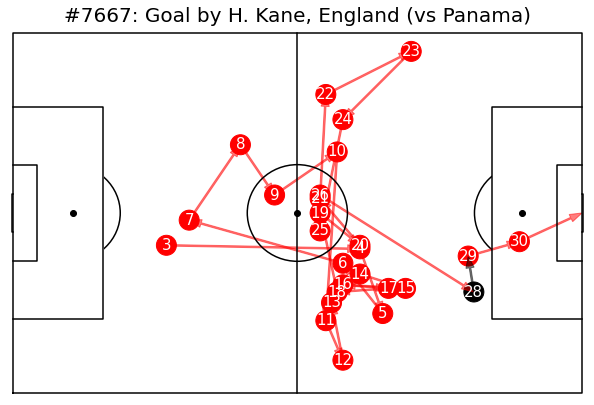

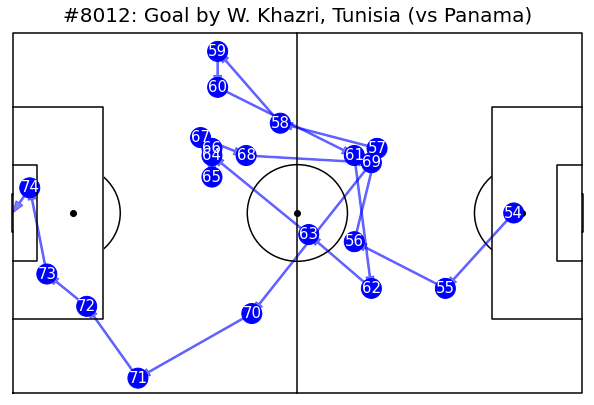

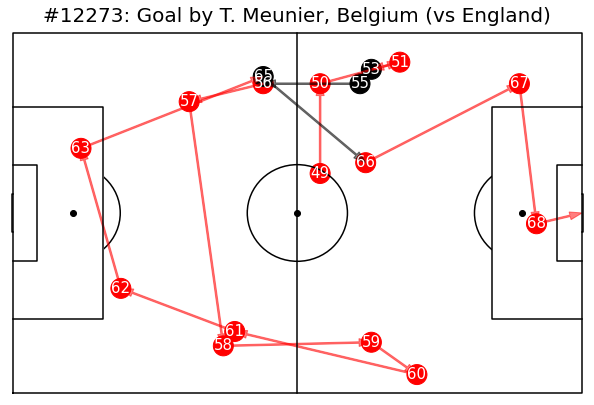

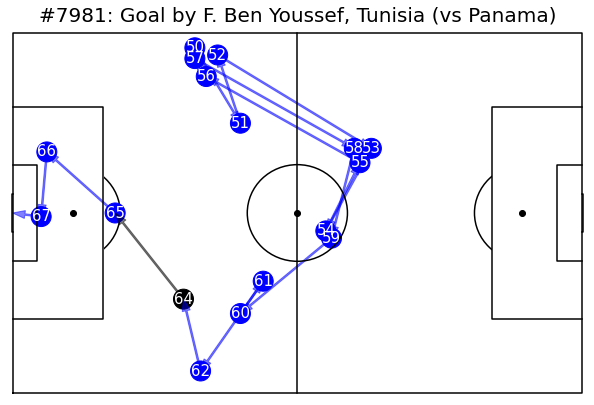

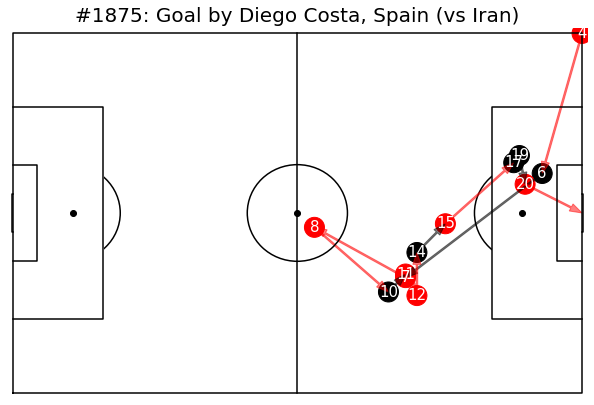

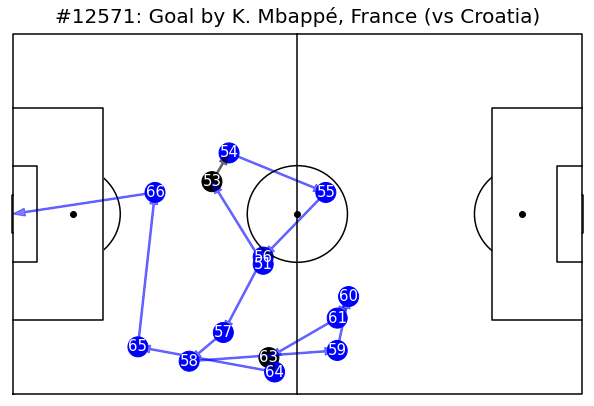

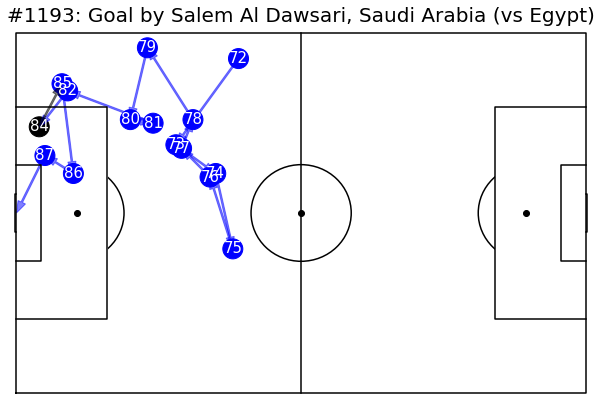

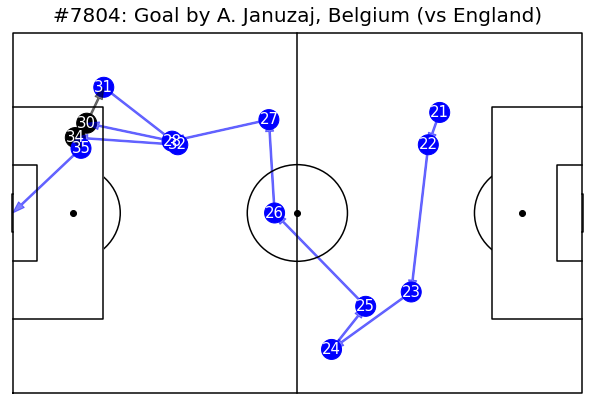

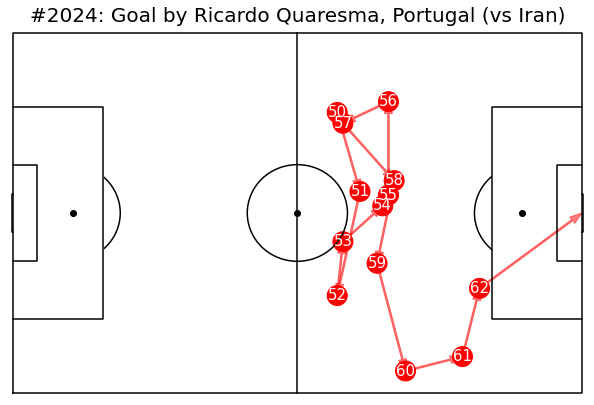

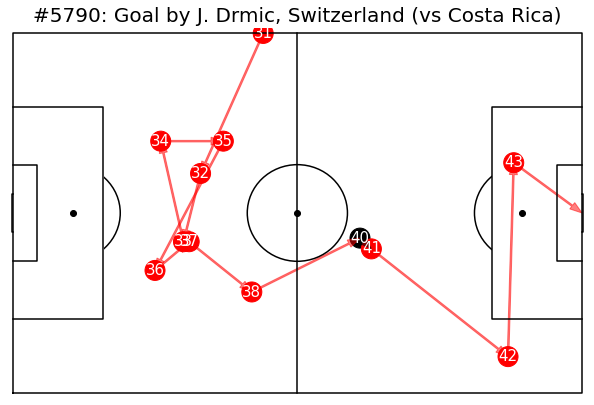

In [33]:
for i in long_goal_seq_records.index:
    first_idx = long_goal_seq_records.at[i, 'first_idx']
    last_idx = long_goal_seq_records.at[i, 'last_idx']

    match_id = events.at[first_idx, 'match_id']
    match_events = events[events['match_id'] == match_id]
    team_names = match_events['team_name'].unique()

    last_event_player = match_events.at[last_idx, 'player_name']
    last_event_tags = match_events.at[last_idx, 'tags']

    team_name = match_events.at[last_idx, 'team_name']
    opponent_name = [x for x in team_names if x != team_name][0]
    title = f"#{i}: Goal by {last_event_player}, {team_name} (vs {opponent_name})"
    visualize_sequence(match_events, first_idx, last_idx, title, rotate_team2_events=True)